# Heirarchial clustering

In [ ]:
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

In [36]:
glass=pd.read_csv("glassClass.csv")

In [37]:
glass.head(6)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [38]:
le = LabelEncoder()
le.fit(glass['Type'])
print(list(le.classes_))
glass['Type'] = le.transform(glass['Type'])

[1, 2, 3, 5, 6, 7]


In [39]:
X=glass[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]

In [40]:
g_matrix = pd.DataFrame.as_matrix(X)

In [ ]:
#Bottom-up algorithms treat each unit as a singleton cluster at the outset and then 
#successively merge (or agglomerate) pairs of clusters until all clusters have been merged into a single cluster 
#that contains all documents. Bottom-up hierarchical clustering is therefore called hierarchical agglomerative clustering or HAC

In [49]:
cluster_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')

In [50]:
cluster_labels = cluster_model.fit_predict(g_matrix)
    

In [51]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 1, 1, 1, 1, 0, 2, 2, 2,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [52]:
g['pred'] = cluster_labels

In [53]:
g.head(6)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,pred
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,0,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,0,1


In [54]:
# Performance Metrics
sm.accuracy_score(g.Type, cluster_model.labels_)

0.30373831775700932

In [47]:
from sklearn import metrics

In [55]:
metrics.adjusted_rand_score(g.Type, cluster_model.labels_)  #adjusted Rand index is a 
#function that measures the similarity of the two assignments

0.23207987402252414

### visualize clustering

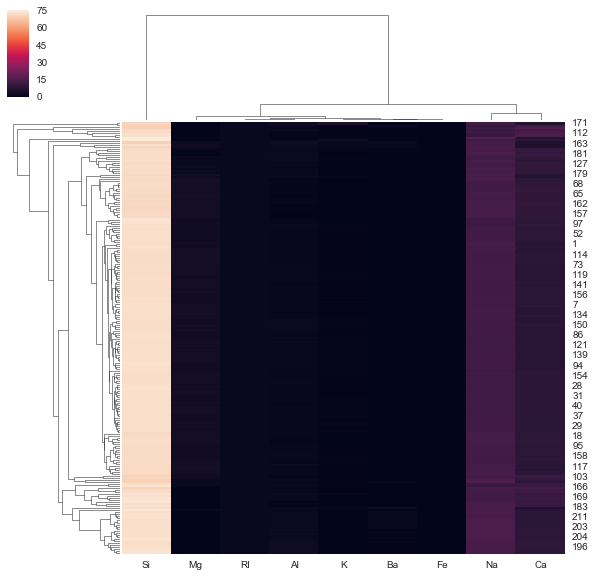

In [60]:
cg = sns.clustermap(glass)
plt.show()



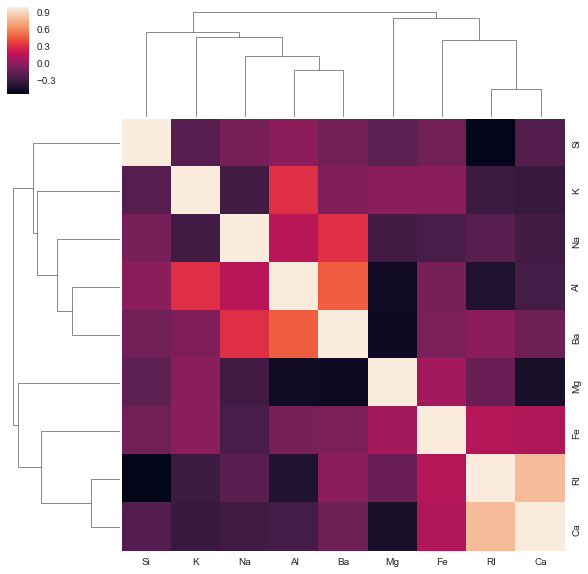

In [61]:
#--- This is the right shape, but how are distances calculated?
cg = sns.clustermap(glass.corr())
plt.show()

In [62]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [114]:
happy=pd.read_csv("happy2015.csv")

In [115]:
happy.head(7)

,Country,Region,Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570


In [116]:
X1=happy[['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)',
          'Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']]

In [77]:
X1.head(5)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
#dendrogram illustrates how each cluster is composed by drawing a U-shaped link between a non-singleton cluster and its children

In [78]:
# generate the linkage matrix
Z = linkage(X1, 'ward') #'ward' is one of the methods that can be used to calculate the distance between newly formed clusters. 

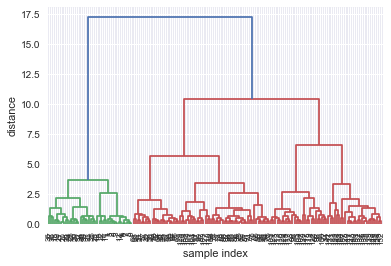

In [80]:
dendrogram(Z, 
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

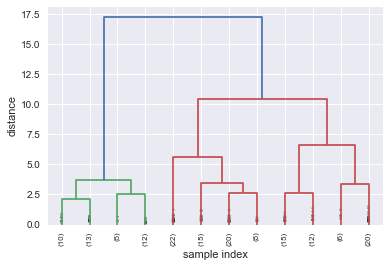

In [82]:
dendrogram(Z, truncate_mode='lastp',p=12,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,show_contracted=True,  
)
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

In [99]:
from scipy.spatial.distance import pdist

In [117]:
X2=happy[['Rank','Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)',
          'Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']]

In [118]:
X2.head(6)

,Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955


In [96]:
# generate the linkage matrix
Z = linkage(X2,  method='complete')

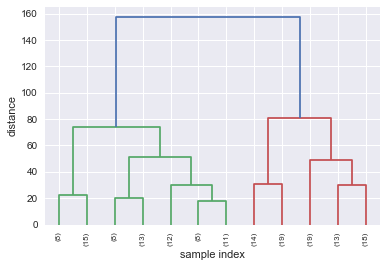

In [98]:
dendrogram(Z, truncate_mode='lastp',p=12,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

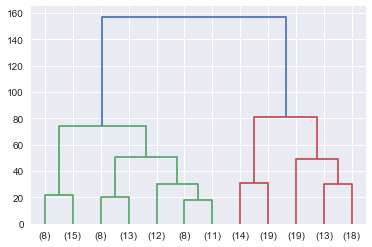

In [138]:
distanceMatrix = pdist(X2)
dend = dendrogram(linkage(distanceMatrix, method='complete'), truncate_mode='lastp',p=12,
            
           leaf_font_size=10,
           labels = X2.Rank.tolist()) #another way of computing distance between clusters

In [124]:
from scipy.cluster.hierarchy import fcluster

In [125]:
assignments = fcluster(linkage(distanceMatrix, method='complete'),4,'distance')

In [139]:
cluster_output = pd.DataFrame({'Rank':X2.Rank.tolist() , 'cluster':assignments})

In [140]:
cluster_output.head(6)

,Rank,cluster
0,1,48
1,2,48
2,3,48
3,4,48
4,5,50
5,6,50


In [143]:
new=pd.merge(cluster_output, happy, on='Rank')

In [144]:
new.head(6)

,Rank,cluster,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,48,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,48,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,48,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,48,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,50,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,6,50,Finland,Western Europe,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955


In [156]:
df1 = new[['Rank','cluster','Country','Region']]

In [157]:
df2=df1[0:15]

In [158]:
df2

,Rank,cluster,Country,Region
0,1,48,Switzerland,Western Europe
1,2,48,Iceland,Western Europe
2,3,48,Denmark,Western Europe
3,4,48,Norway,Western Europe
4,5,50,Canada,North America
5,6,50,Finland,Western Europe
6,7,50,Netherlands,Western Europe
7,8,50,Sweden,Western Europe
8,9,49,New Zealand,Australia and New Zealand
9,10,49,Australia,Australia and New Zealand


In [172]:
var = df2.groupby(['cluster','Region','Country'])

In [176]:
var.sum()

Rank
cluster Region                          Country            
46      North America                   United States    15
47      Latin America and Caribbean     Costa Rica       12
                                        Mexico           14
        Middle East and Northern Africa Israel           11
        Western Europe                  Austria          13
48      Western Europe                  Denmark           3
                                        Iceland           2
                                        Norway            4
                                        Switzerland       1
49      Australia and New Zealand       Australia        10
                                        New Zealand       9
50      North America                   Canada            5
        Western Europe                  Finland           6
                                        Netherlands       7
                                        Sweden            8

In [183]:
import sklearn.cluster as cluster

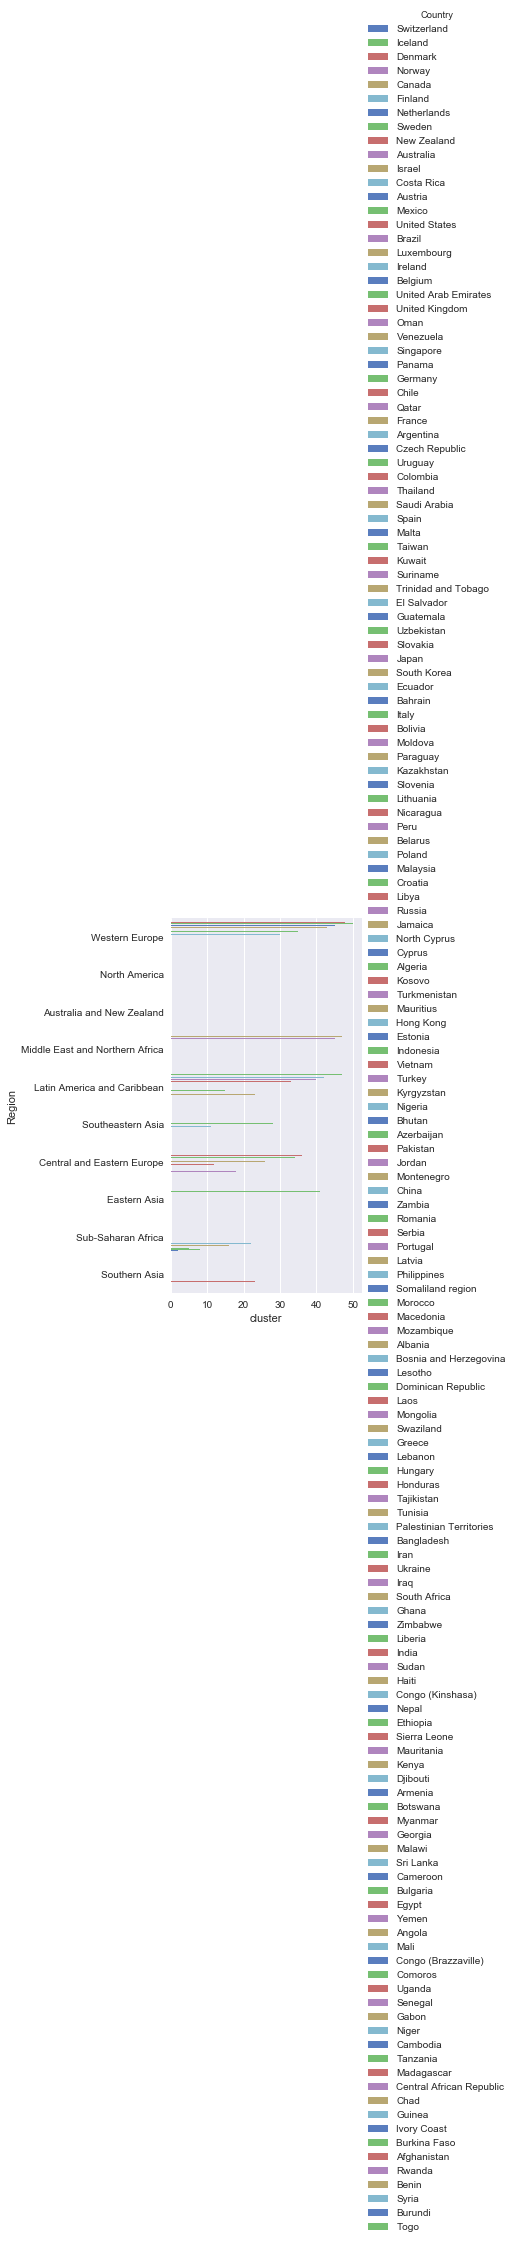

In [149]:
# Draw a nested barplot to show survival for class and sex
g = sns.factorplot(x="cluster", y="Region", hue="Country", data=new,
                   size=6, kind="bar", palette="muted")

In [129]:
x=cluster_output.groupby("cluster")

In [133]:
X3=happy[['Country','Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)',
          'Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']]

In [134]:
X3.head(7)

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
